# Smart Fields, Rich Yields: A Tech-Driven Harvest Quest

<em>Problem description</em>: In the agricultural industry, characterized by intense competition, there exists a critical deficiency in comprehensive indicators designed to enhance the efficiency and outcomes of the crop lifecycle, encompassing the stages of planting, growing, and harvesting. The absence of robust metrics and benchmarks hinders farmers and stakeholders from making informed decisions, thereby limiting the industry's potential for optimization and sustainable growth. This lack of indicators not only jeopardizes individual farm productivity but also poses a broader challenge to the industry's ability to adapt to evolving demands and advancements in agricultural practices. Addressing this deficiency is paramount for fostering innovation, improving resource management, and ensuring the long-term viability of the agricultural sector.

<em>How the solution will be used</em>: 

**Model Development:**

<em>Data Collection</em>: Gather relevant data pertaining to the crop lifecycle, including planting, growing, and harvesting phases. This dataset should encompass diverse variables such as weather conditions, soil quality, irrigation practices, and historical crop performance.

<em>Feature Engineering</em>: Identify and preprocess key features within the dataset that significantly influence the crop lifecycle.

<em>Model Training</em>: Utilize machine learning algorithms to develop a predictive model capable of analyzing the dataset and making accurate predictions related to crop outcomes.

<em>Evaluation and Tuning</em>: Assess the model's performance using validation datasets, and fine-tune parameters to optimize predictive accuracy and reliability.

## Import Dataset

In [89]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import seaborn as sns

Import the data frame

In [9]:
blockOfData = pd.read_csv('Crop_recommendation.csv')

Inspect the data frame

In [20]:
print(blockOfData.shape)
blockOfData.head(1000)

(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
995,33,23,45,20.002190,85.836182,7.116539,112.337046,pomegranate
996,4,14,41,19.851393,89.807323,6.430163,102.818636,pomegranate
997,13,17,45,21.254336,92.650589,7.159521,106.278467,pomegranate
998,39,24,39,23.653741,93.326575,6.431266,109.807618,pomegranate


In [17]:
blockOfData['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [22]:
blockOfData.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

## EDA

Reference data frame information

In [23]:
blockOfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Inspect any null values

In [41]:
blockOfData.isna().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

Search for duplicates

In [46]:
blockOfData.duplicated().value_counts()

False    2200
dtype: int64

Clean data

In [107]:
strings =list(blockOfData.dtypes[blockOfData.dtypes=='object'].index)
strings

['label']

In [108]:
for col in strings:
    blockOfData[col] = blockOfData[col].str.lower().str.replace(' ','_')

In [109]:
blockOfData.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Horizontal BC

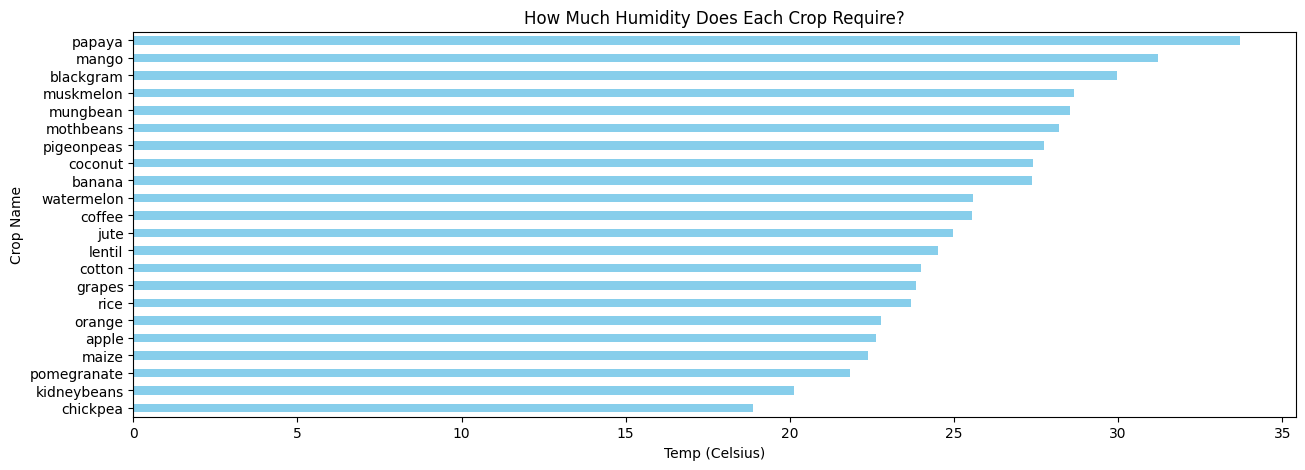

In [38]:
# Group and aggregate temperature data
data_by_temp = blockOfData.groupby('label')['temperature'].mean().sort_values()

# Define a color for the bars (e.g., 'skyblue')
color_of_bar = 'skyblue'

# Plot the data with the specified color
fig, ax = plt.subplots(figsize=(15, 5))
data_by_temp.plot(kind='barh', ax=ax, color=bar_color)

# Set axis labels and title
ax.set_xlabel('Temp (Celsius)')
ax.set_ylabel('Crop Name')
ax.set_title('How Much Humidity Does Each Crop Require?')

# Display the plot
plt.show()

Descriptive Analysis

In [47]:
blockOfData.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
N,2200.0,50.551818,36.917334,0.000000,0.000000,8.000000,21.000000,37.000000,84.250000,107.000000,116.000000,129.010000,140.000000
P,2200.0,53.362727,32.985883,5.000000,5.000000,16.000000,28.000000,51.000000,68.000000,89.100000,133.000000,143.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,5.000000,16.000000,20.000000,32.000000,49.000000,83.100000,199.000000,204.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,8.825675,19.250363,22.769375,25.598693,28.561654,31.330131,34.056636,40.791352,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,14.258040,36.663404,60.261953,80.473146,89.948771,93.065588,94.368844,96.966445,99.981876
ph,2200.0,6.469480,0.773938,3.504752,3.504752,5.626977,5.971693,6.425045,6.923643,7.425390,7.748417,8.736512,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,20.211267,43.944456,64.551686,94.867624,124.267508,187.947933,209.542438,267.991472,298.560117


Calculate the median

In [48]:
np.median(blockOfData['rainfall'])

94.86762427

Examine each label's values

In [45]:
# Apply the lowercase method to address potential matching concerns.

blockOfData["label"] = blockOfData["label"].str.lower()

# Create a subset dataframe specifically for "coffee" labels
coffee_df = blockOfData[blockOfData["label"] == "coffee"]

# Display the dataframe containing only "coffee" labels
print(coffee_df)

        N   P   K  temperature   humidity        ph    rainfall   label
2100   91  21  26    26.333780  57.364700  7.261314  191.654941  coffee
2101  107  21  26    26.452885  55.322227  7.235070  144.686134  coffee
2102   83  38  35    25.708227  52.886671  7.189156  136.732509  coffee
2103  108  24  31    24.128325  56.181077  6.431900  147.275782  coffee
2104  116  28  34    23.443723  60.395233  6.423211  122.210325  coffee
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[100 rows x 8 columns]


Histogram

C:\Users\MyWor\AppData\Local\Temp\ipykernel_11936\3266542303.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  blockOfData.hist(bins=50, ax=ax, layout=(4, 2), column=["rainfall", "temperature", "N", "P"])


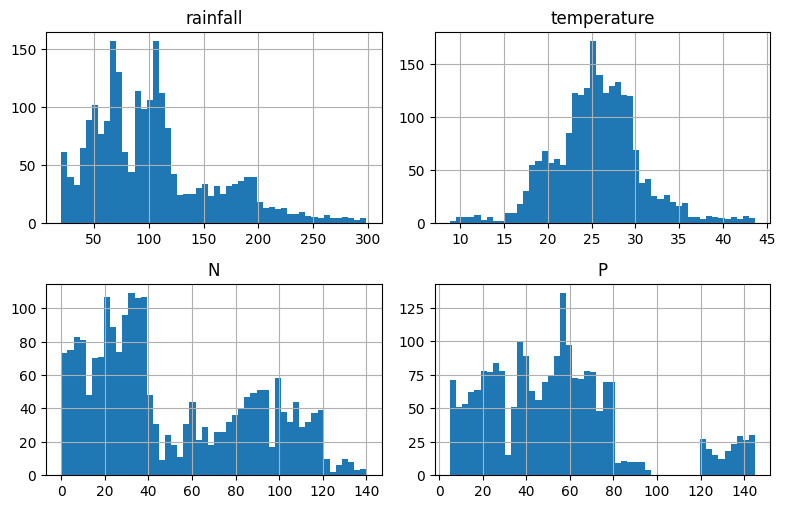

In [67]:
feat = plt.figure(figsize=(8, 10))
ax = plt.gca()
blockOfData.hist(bins=50, ax=ax, layout=(4, 2), column=["rainfall", "temperature", "N", "P"])

plt.tight_layout()
plt.show()           

In [69]:
print(blockOfData.head())
print(blockOfData.columns)
text = blockOfData['K'].iloc[0]

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


C:\Users\MyWor\AppData\Local\Temp\ipykernel_11936\1145788001.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = blockOfData.corr()


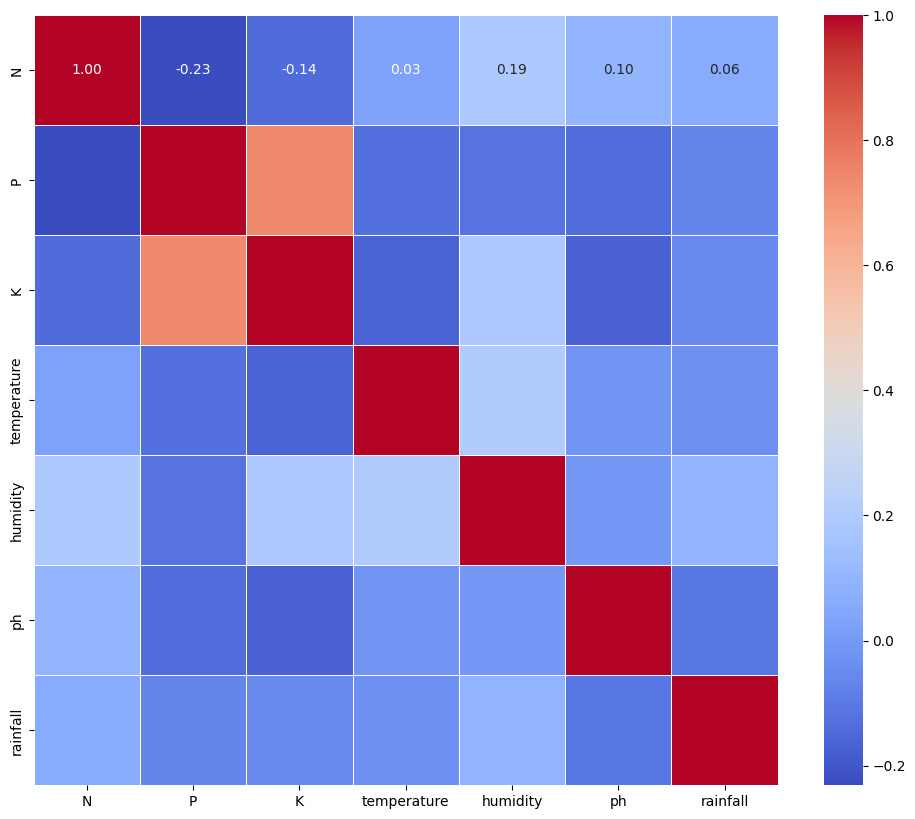

In [93]:
# Increase the size of the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix for the DataFrame 'df'
correlation_matrix = blockOfData.corr()

# Adjust font size and rotate axis labels
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)

# Display the heatmap
plt.show()

## Model Training

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

Separate the features and target labels

In [123]:
features = blockOfData[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = blockOfData['label']
labels = blockOfData['label']

In [124]:
# Initialize empty lists to store model names and corresponding accuracies
model_list = []
accuracy_list = []

Split the test and train data

In [125]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

Decision Tree Model

In [128]:
# Initialize the Decision Tree Classifier with specified parameters
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

# Train the Decision Tree model using the training data
decision_tree.fit(Xtrain, Ytrain)

# Make predictions on the test data
predicted_values = decision_tree.predict(Xtest)

# Calculate and store the accuracy
accuracy = metrics.accuracy_score(Ytest, predicted_values)
accuracy_list.append(accuracy)

# Append the model name to the list
model_list.append('Decision Tree')

# Display the accuracy and classification report
print("Decision Tree's Accuracy is: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest, predicted_values))

Decision Tree's Accuracy is: 90.00%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00  

c:\Users\MyWor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MyWor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MyWor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Cross-validation score

In [133]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(decision_tree, features, target, cv=5)


Tune the decision tree parameters

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [138]:
# Assume 'features' and 'target' is the feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Define the hyperparameters and their possible values to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model Accuracy: 0.9886363636363636


Logistic Regression Model

In [148]:
from sklearn.linear_model import LogisticRegression

In [152]:
# Assuming you have 'test_X' and 'test_y' for your test set
predictions = logistic_regression_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy of the Logistic Regression model
print(f"Logistic Regression (accuracy): {accuracy * 100}%")

Logistic Regression (accuracy): 94.54545454545455%


Tune the LRM parameters

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [155]:
# Assume 'x_train' and 'y_train' are in the training data
# Create a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Define the hyperparameters and their possible values to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best Logistic Regression model
best_logistic_regression_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Tuned Logistic Regression (accuracy): {:.2f}%".format(accuracy * 100))

c:\Users\MyWor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MyWor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression (accuracy): 96.59%


c:\Users\MyWor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Further Development

**Web Application Development**:

<em>User Interface Design</em>: Create an intuitive and visually appealing web interface accessible to farmers. This interface should be designed for ease of use and understanding.

<em>Integration with Model</em>: Incorporate the trained machine learning model into the web application, allowing users to input relevant data and receive predictions regarding their crop lifecycle.

<em>Interactivity</em>: Implement features that enable users to interact with the model, such as adjusting input parameters, visualizing predictions, and receiving recommendations.

<em>User Feedback Mechanism</em>: Integrate a feedback system to gather user input and continuously improve the model's accuracy and relevance.

<em>Accessibility and Scalability</em>: Ensure the web application is easily accessible across different devices and scalable to accommodate potential future enhancements or increased user traffic.

**Deployment and Maintenance**:

<em>Cloud Deployment</em>: Deploy the machine learning model and the web application on a cloud platform for scalability and accessibility.

<em>Monitoring and Updates</em>: Implement monitoring tools to track the performance of the model and application. Regularly update the model with new data to enhance its predictive capabilities.

<em>User Support</em>: Provide ongoing support and resources to assist farmers in effectively utilizing the web application and understanding the insights provided by the machine learning model.